In [21]:
!pip install scikit-image


In [22]:
!pip install pycocotools

In [23]:
!pip install seaborn

In [24]:
!pip install numpy


In [25]:
!pip install matplotlib

In [26]:
!pip install tensorboard


In [27]:
#Importing Libraries
#1
%matplotlib inline
from pycocotools.coco import COCO      #common objects in context. (for computer vision)  
import numpy as np                     #for mathematical operations
import skimage.io as io                #for image processing
import matplotlib.pyplot as plt        #for plotting 
import pylab                           #for image size
import random
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

# For visualization
import os                                          # for reading and writing in file 
import seaborn as sns                              #data visualization 
from matplotlib import colors                      # colors to plotted graph
from tensorboard.backend.event_processing import event_accumulator as ea    # for visualizing training and evaluation metrics
from PIL import Image                              # for opening, manipulating, and saving various image formats.

In [28]:
#Loading the COCO Dataset

dataDir='val'
dataType='COCO_val_annos'
mul_dataType='COCO_mul_val_annos'
annFile='{}/{}.json'.format(dataDir,dataType)
mul_annFile='{}/{}.json'.format(dataDir,mul_dataType)
img_dir ='img'

In [29]:
coco = COCO(r'C:\Users\karunakar reddy\OneDrive\Desktop\mini project\archive\val\COCO_val_annos.json')
mul_coco = COCO(r"C:\Users\karunakar reddy\OneDrive\Desktop\mini project\archive\val\COCO_mul_val_annos.json")


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [30]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories for damages: \n{}\n'.format(', '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories for damages: \n{}\n'.format(', '.join(nms)))

#Multi Class 
#Parts dataset

mul_cats = mul_coco.loadCats(mul_coco.getCatIds())
mul_nms=[cat['name'] for cat in mul_cats]
print('COCO categories for parts: \n{}\n'.format(', '.join(mul_nms)))

mul_nms = set([mul_cat['supercategory'] for mul_cat in mul_cats])
print('COCO supercategories for parts: \n{}\n'.format(', '.join(mul_nms)))

COCO categories for damages: 
damage

COCO supercategories for damages: 
part

COCO categories for parts: 
headlamp, rear_bumper, door, hood, front_bumper

COCO supercategories for parts: 
part



In [31]:
catIds = coco.getCatIds(catNms=['damage']); #2
imgIds = coco.getImgIds(catIds=catIds );

In [32]:
#randomly selects an image ID.
I = io.imread(r"C:\Users\karunakar reddy\OneDrive\Desktop\mini project\archive\val\9.jpg")
random_img_id = random.choice(imgIds)
print("{} image id was selected at random from the {} list".format(random_img_id, imgIds))


4 image id was selected at random from the [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] list


In [33]:
#Selecting a Image and Loading its Details

imgId = coco.getImgIds(imgIds = [random_img_id])
img = coco.loadImgs(imgId)[0]
print("Image details \n",img)

Image details 
 {'coco_url': '', 'date_captured': '2020-07-14 09:59:34.190485', 'file_name': '32.jpg', 'flickr_url': '', 'height': 1024, 'id': 4, 'license': 1, 'width': 1024}


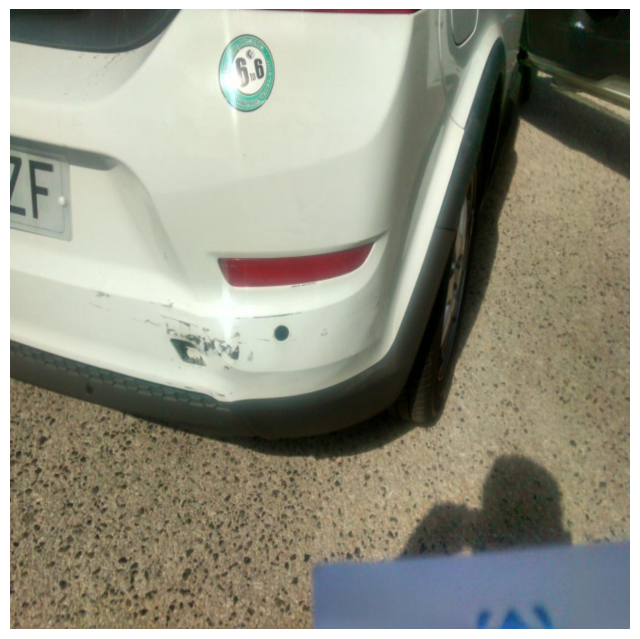

In [34]:
#Displaying the Selected Image.

I = io.imread(r"C:\Users\karunakar reddy\OneDrive\Desktop\mini project\archive\val\3.jpg")
plt.axis('off')
plt.imshow(I)
plt.show()

In [35]:
#Visualizing Annotations for Car Damages.

annIds = coco.getAnnIds(imgIds=imgId,iscrowd=None)  
anns = coco.loadAnns(annIds)

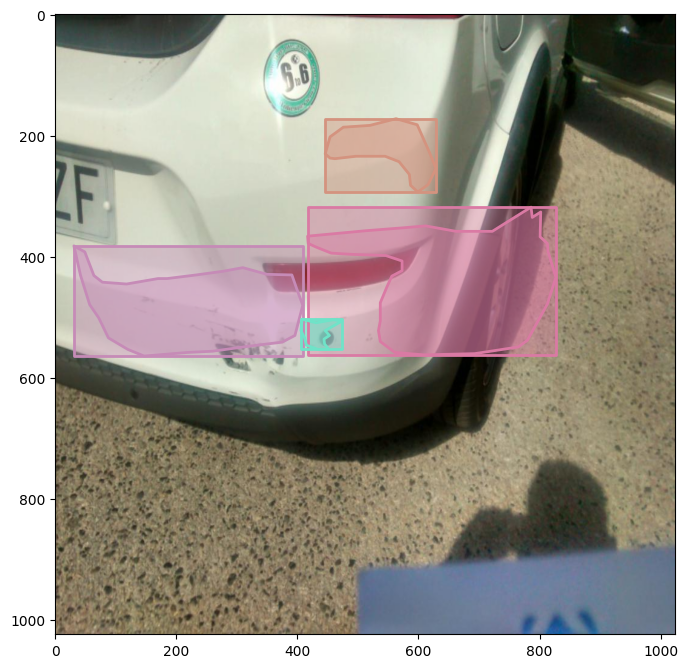

In [36]:
plt.imshow(I)
plt.axis('on')
coco.showAnns(anns, draw_bbox=True )

In [37]:
# Retrieving and Visualizing Annotations for Car Parts
# (Multi-Class Parts Dataset)
mul_annIds = mul_coco.getAnnIds(imgIds=imgId, iscrowd=None)
mul_anns = mul_coco.loadAnns(mul_annIds)




In [38]:
category_map = dict() #4

for ele in list(mul_coco.cats.values()):
    category_map.update({ele['id']:ele['name']})

In [39]:
category_map

{1: 'headlamp', 2: 'rear_bumper', 3: 'door', 4: 'hood', 5: 'front_bumper'}

Parts are: ['headlamp', 'rear_bumper', 'headlamp']


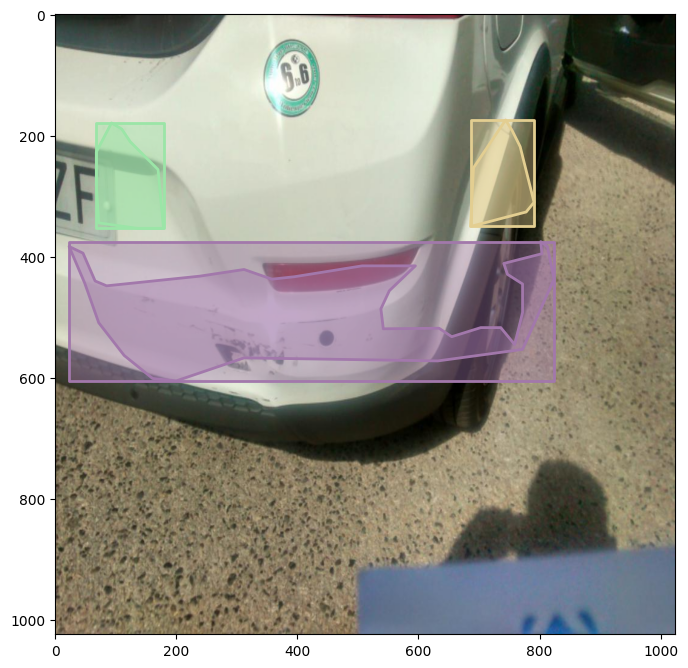

In [40]:
#Plotting Parts.

parts = []
for region in mul_anns:
    parts.append(category_map[region['category_id']])

print("Parts are:", parts) 

#Plot Parts

I = io.imread(r"C:\Users\karunakar reddy\OneDrive\Desktop\mini project\archive\val\3.jpg")
plt.imshow(I)
plt.axis('on')
mul_coco.showAnns(mul_anns, draw_bbox=True )